In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
real_data = pd.read_csv('datasets/baseline.csv')
synthetic_data = pd.read_csv('synthetic/synthetic_data_timeseries1.csv')

### Descriptive Statistics Comparison

In [13]:
real_data_stats = real_data.describe().transpose()
synthetic_data_stats = synthetic_data.describe().transpose()

absolute_difference_stats = (real_data_stats - synthetic_data_stats)
percentage_difference_stats = (absolute_difference_stats / real_data_stats) * 100
percentage_difference_stats.drop('count',axis=1,inplace=True)
percentage_difference_stats = percentage_difference_stats.add_suffix('_in_%')
percentage_difference_stats

,mean_in_%,std_in_%,min_in_%,25%_in_%,50%_in_%,75%_in_%,max_in_%
time,-0.33201,-9.64508,0.00000,-0.07929,-0.87758,-0.20879,0.03362
user_id,-8865732990.93948,-5585954079.46591,-24898973200.00000,-12357289700.00000,-11453758571.42857,-7158363891.66667,-6078923837.50000
session_id,6.10708,60.00141,24200.00000,-181.15942,-13.45029,39.06250,-10.20833
acc_var,0.52858,59.10012,-267.57319,224.16356,-inf,14.57960,57.50980
hr,-1.90560,68.57086,31.74035,153.49637,-inf,54.56544,82.69890
rmssd,-1.19455,73.01918,64.91664,114.60896,-inf,85.17316,77.15705
sdnn,1.18348,67.79516,121.56461,-44.31881,-9.61987,16.29996,63.52424
temp,-7.04704,53.74650,67.68198,40.48711,inf,179.47873,-66.39551
eda,-0.07424,78.82549,-2829.71399,2262.52276,-inf,-507.65407,96.39986
eda_freq,0.03689,58.75932,inf,-112.01003,-6.38552,28.82334,33.63443


### Distributions

In [14]:
def plot_distributions(real_data, synthetic_data, show_figures = 40):
    columns = real_data.columns
    for i, column in enumerate(columns):
        if synthetic_data[column].loc[0] == 0 or i<=2:
            continue
        if i >= show_figures:
            break
        real_data[column].plot(kind='density', label='Real Data', color='blue')
        synthetic_data[column].plot(kind='density', label='Synthetic Data', color='orange')
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.tight_layout()
        plt.show()

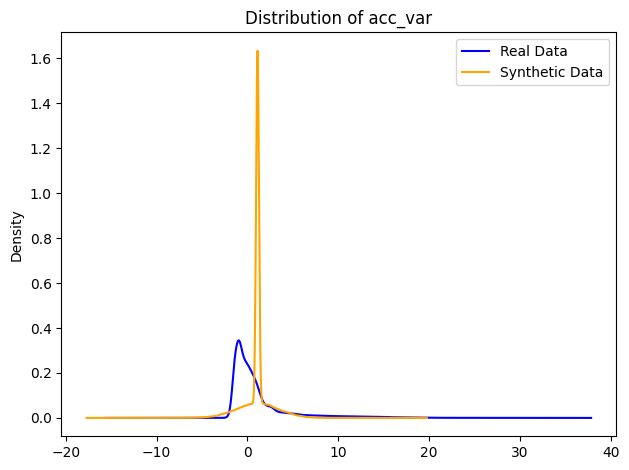

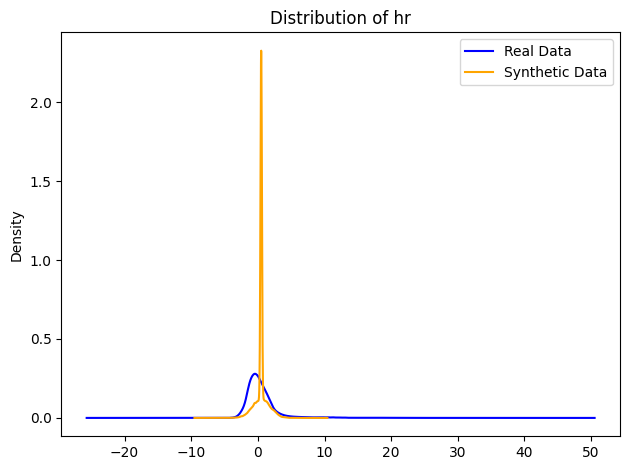

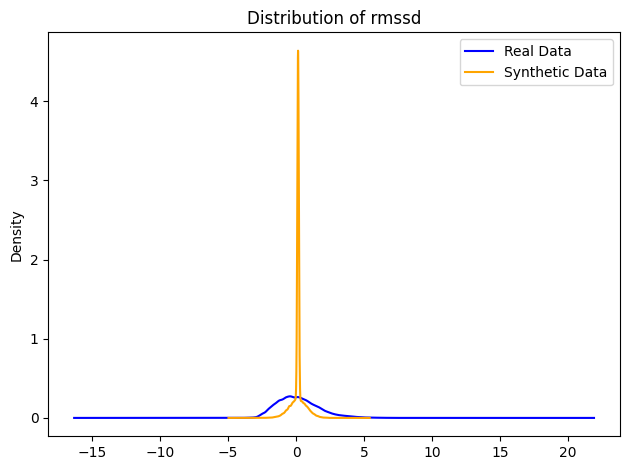

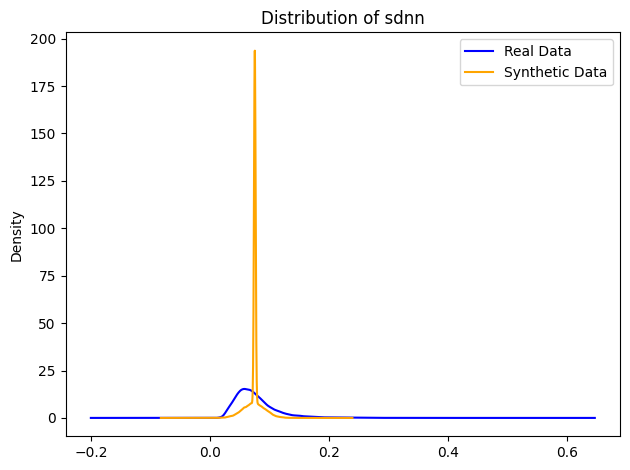

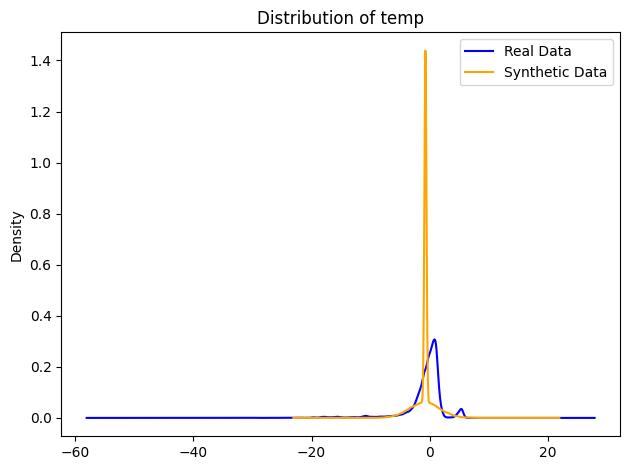

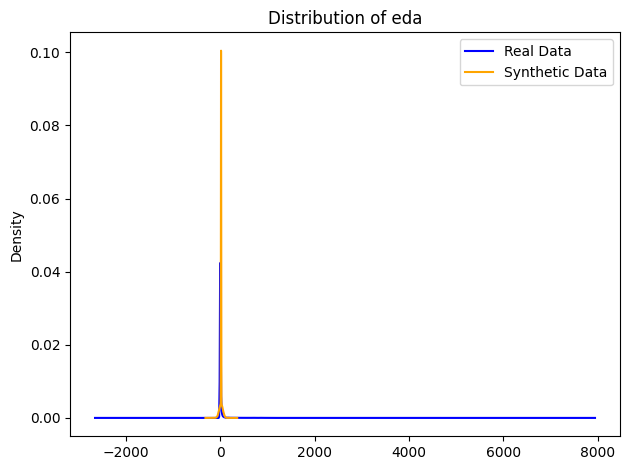

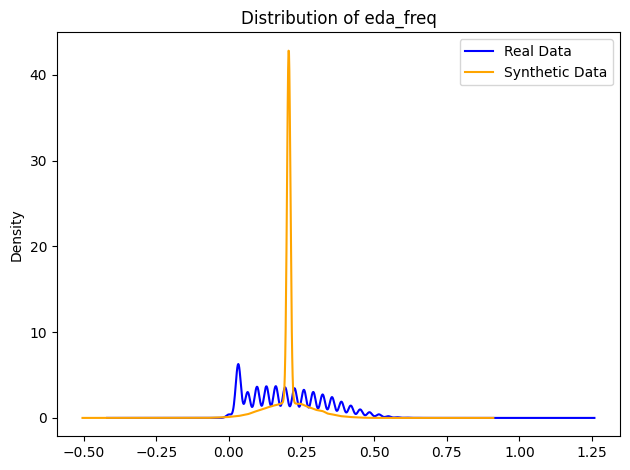

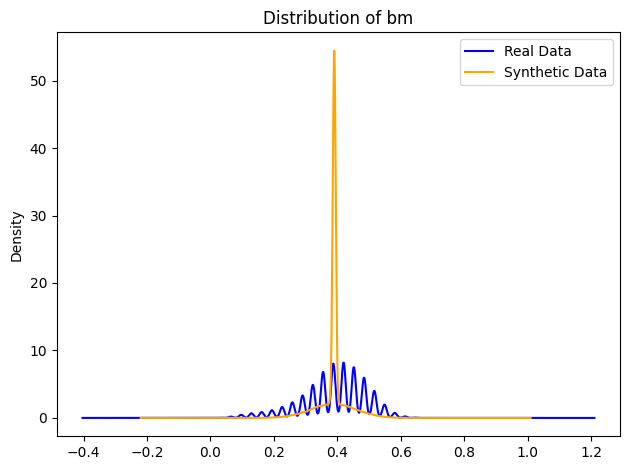

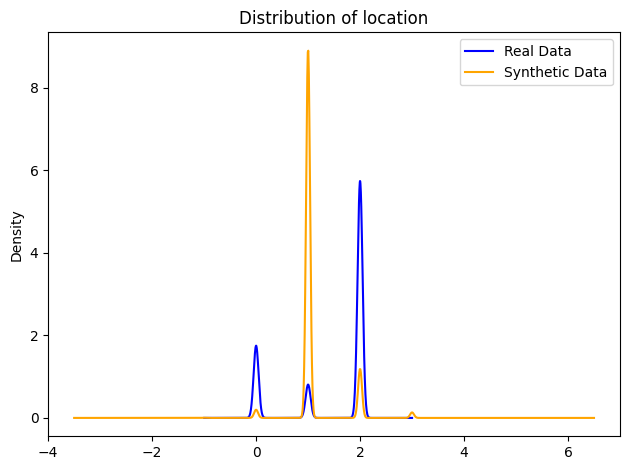

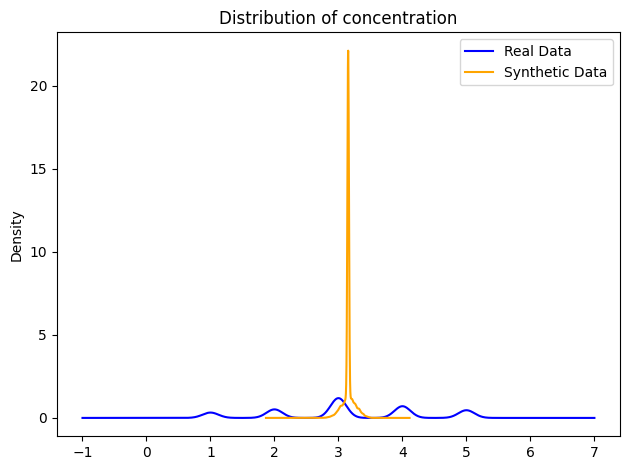

In [15]:
plot_distributions(real_data, synthetic_data)

### Kolmogorov–Smirnov test

In [16]:
from scipy.stats import ks_2samp
def ks_test_on_dataframes(real_data, synthetic_data):
    results = {}
    for column in real_data.columns:
        if column in synthetic_data.columns:
            stat, p_value = ks_2samp(real_data[column], synthetic_data[column])
            results[column] = {'KS Statistic': stat, 'p-value': p_value}
    return results
ks_results = ks_test_on_dataframes(real_data, synthetic_data)
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
pd.DataFrame(ks_results).transpose()

,KS Statistic,p-value
time,0.45052,0.00000
user_id,1.00000,0.00000
session_id,0.37529,0.00000
acc_var,NaN,NaN
hr,NaN,NaN
rmssd,NaN,NaN
sdnn,NaN,NaN
temp,NaN,NaN
eda,NaN,NaN
eda_freq,NaN,NaN


###  Correlation Analysis

In [17]:
correlation_real = real_data.corr()
correlation_synthetic = synthetic_data.corr()

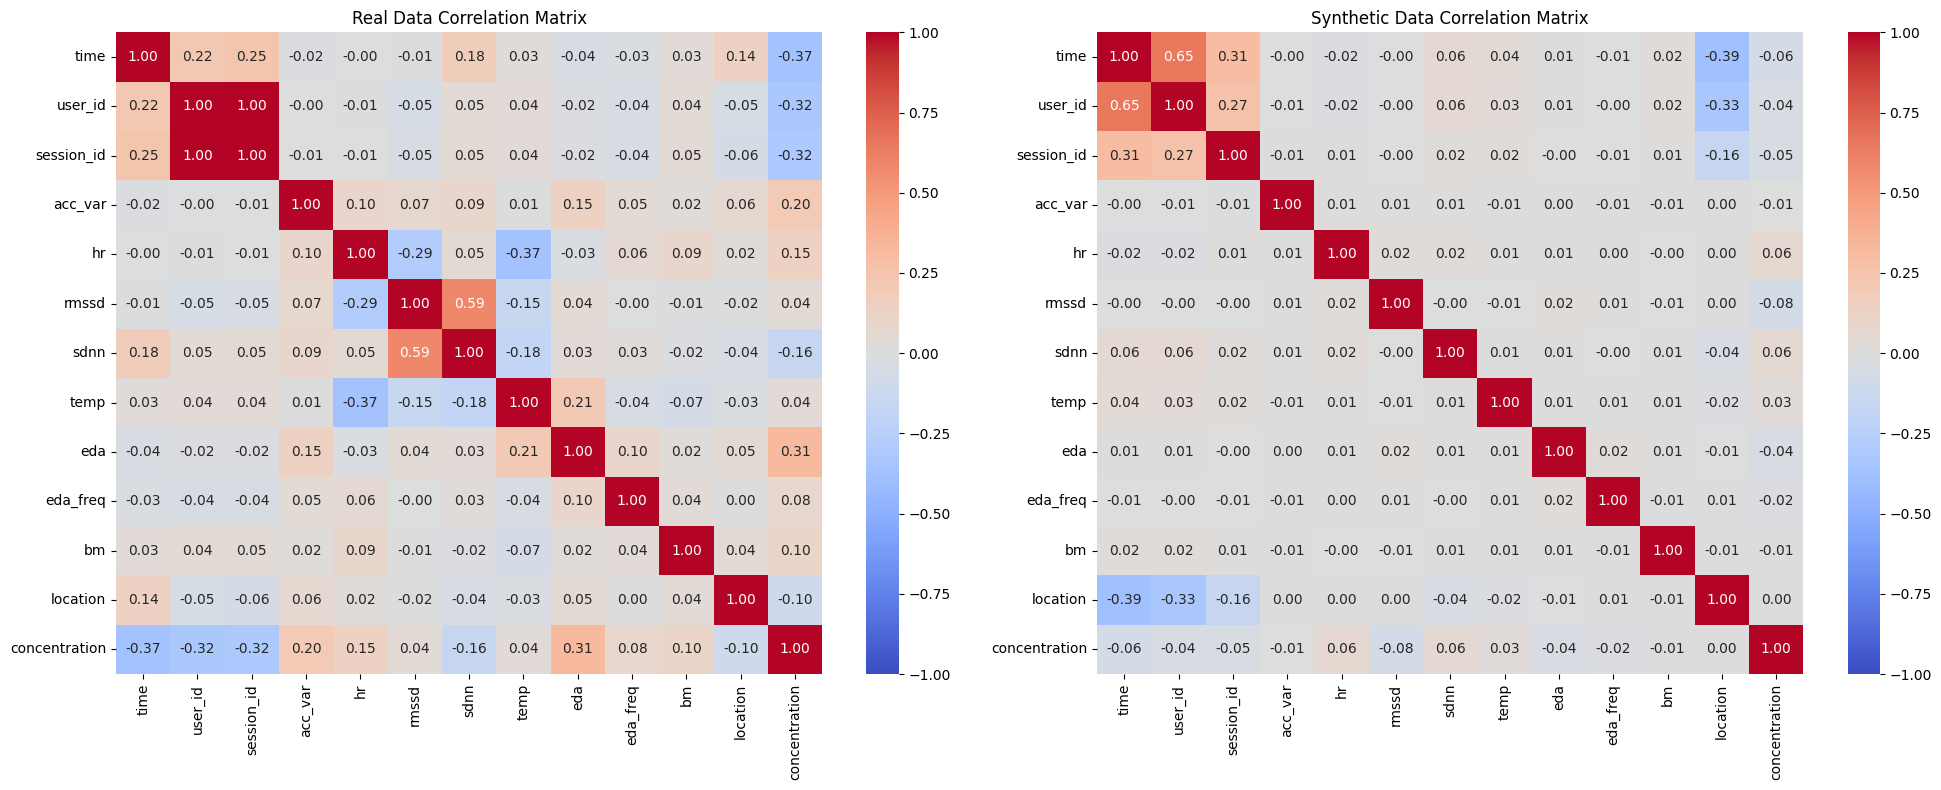

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
sns.heatmap(correlation_real, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Real Data Correlation Matrix')
sns.heatmap(correlation_synthetic, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Synthetic Data Correlation Matrix')
plt.tight_layout()
plt.show()

#### Difference Correlation Maxtrix

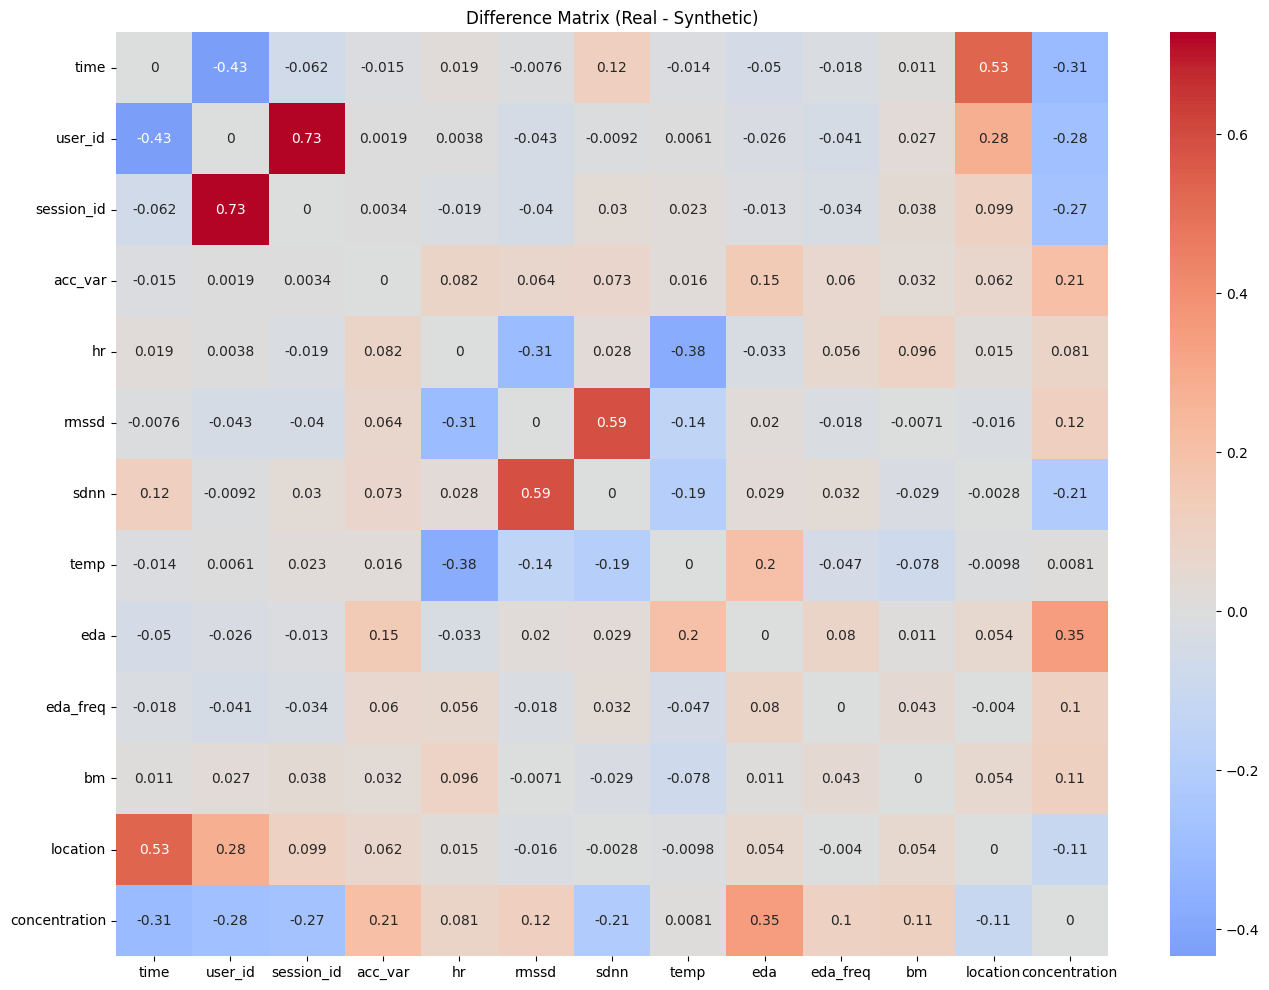

In [19]:
difference_matrix = correlation_real - correlation_synthetic
plt.figure(figsize=(16, 12)) 
sns.heatmap(difference_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Difference Matrix (Real - Synthetic)')
plt.show()

Correlation of Correlations

In [20]:
# Extract the upper triangular part of the correlation matrices excluding the diagonal
triu_indices = np.triu_indices_from(correlation_real, k=1)
real_upper = correlation_real.values[triu_indices]
synthetic_upper = correlation_synthetic.values[triu_indices]
# Compute the correlation between the upper triangular values
comparison_corr = np.corrcoef(real_upper, synthetic_upper)[0, 1]
print(f'Correlation between real and synthetic correlation matrices: {comparison_corr}')

Correlation between real and synthetic correlation matrices: 0.3297378838264839
